In [1]:

import numpy as np
import pandas as pd
import pickle
import networkx as nx 
import osmnx as ox 
import numpy as np 
import seaborn as sns 

import pandas as pd
import networkx as nx
from shapely.geometry import Point, LineString
import pickle
from tqdm import tqdm 

import matplotlib.pyplot as plt

In [2]:
# # Load graph
# with open(r"C:\Users\anton\Desktop\Master-Oppgave\Kode\New_Traffic\data\BaseGraph_E_NOR_wagrades.pickle", 'rb') as file:
#     G = pickle.load(file)

#Load volume dataset
csv_pd=pd.read_excel("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/TrafficVolume/data/weekly_data_xl.xlsx")
csv_pd.drop(columns='Unnamed: 0', inplace=True)
csv_pd.head()

,id,name,lat,lon,volume,year,month,volume1,volume2
0,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13023,2018,1,6512,6512
1,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13998,2018,2,6999,6999
2,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13878,2018,3,6939,6939
3,41379V1201935,MESNADALSARMEN,61.115044,10.456279,14288,2018,4,7144,7144
4,41379V1201935,MESNADALSARMEN,61.115044,10.456279,14669,2018,5,7334,7334


In [3]:
csv_pd_woDup = csv_pd.copy().drop_duplicates('id').reset_index(drop=True)
csv_pd_woDup

,id,name,lat,lon,volume,year,month,volume1,volume2
0,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13023,2018,1,6512,6512
1,43294V181263,MEHEIA STASJON,59.629705,9.499576,4098,2018,1,2049,2049
2,76082V578594,Svemarka,63.542709,10.862757,6651,2018,1,3326,3326
3,21376V2607269,Ørje,59.484949,11.745634,4636,2018,1,2318,2318
4,68771V2258479,KLINESTAD,59.164143,10.199460,25770,2018,1,12885,12885
...,...,...,...,...,...,...,...,...,...
636,55982V384008,LJØSNE,61.049293,7.594630,1817,2018,1,908,908
637,53385V249032,Elvadalen,62.143426,6.074885,8030,2018,1,4015,4015
638,60900V248916,Molde fergekai øst,62.737082,7.178031,7437,2018,1,3718,3718
639,45383V319532,Haukås,59.347443,5.453745,3741,2018,1,1870,1870


In [25]:
 # read in the road network graph
with open("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/roadNetwork_Venv/data/BaseGraph_eRoad.pickle", 'rb') as file:
    G = pickle.load(file)

with open("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/roadNetwork_Venv/data/BaseGraph0_3NOR_wagrades.pickle", 'rb') as file:
    H = pickle.load(file)


/var/folders/67/gxr6c90j7x9_c9pz8lgvd8n40000gn/T/ipykernel_64132/3341442136.py:3: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  G = pickle.load(file)
/var/folders/67/gxr6c90j7x9_c9pz8lgvd8n40000gn/T/ipykernel_64132/3341442136.py:6: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  H = pickle.load(file)


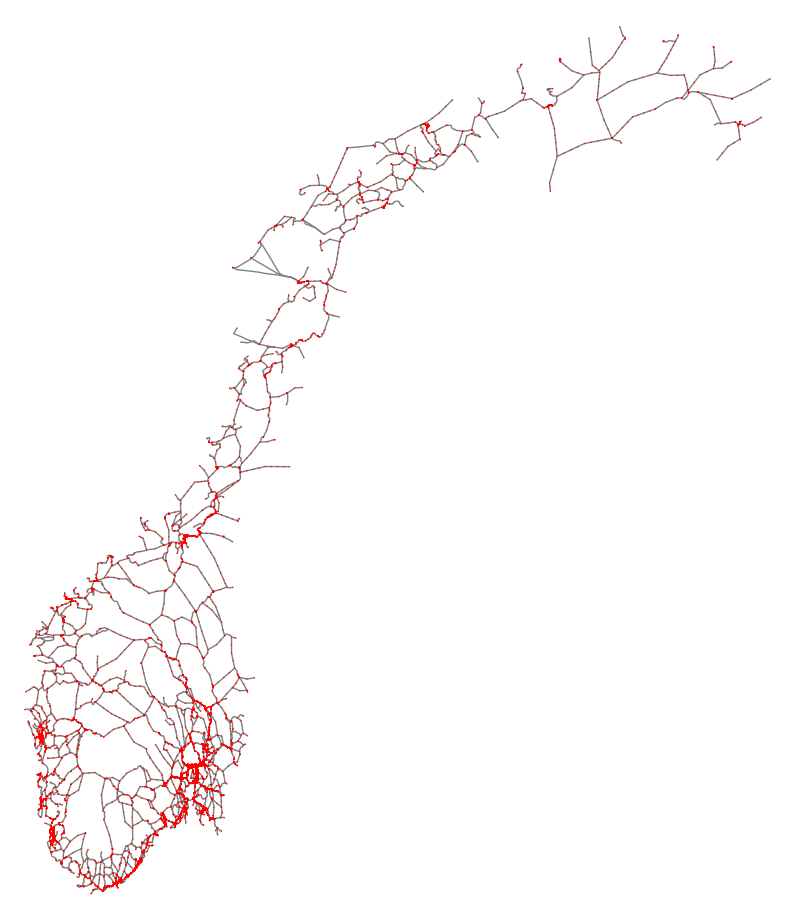

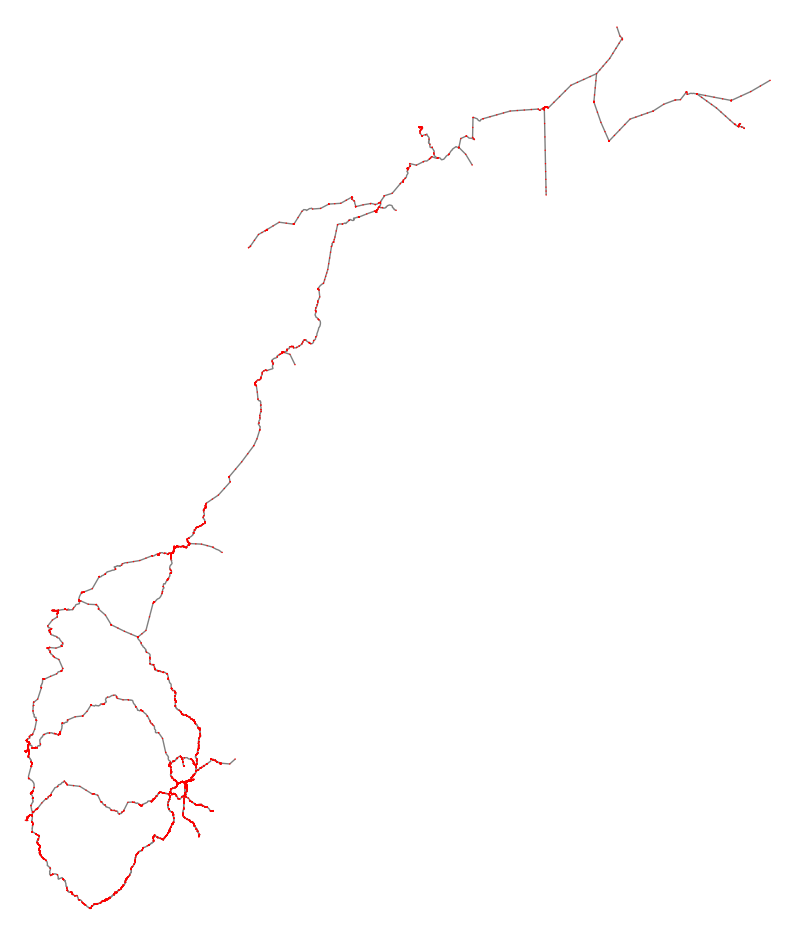

(<Figure size 1000x1500 with 1 Axes>, <AxesSubplot: >)

In [5]:
#Plot graph
ox.plot_graph(H, figsize = (10, 15), node_color="red", edge_color = "gray", bgcolor = "white", node_size=1, edge_linewidth = 1)
ox.plot_graph(G, figsize = (10, 15), node_color="red", edge_color = "gray", bgcolor = "white", node_size=1, edge_linewidth = 1)

In [7]:
# create a dictionary mapping node IDs to (x, y) coordinates
node_coords = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

In [8]:
# read in the dataframe with the traffic points
points_df = csv_pd_woDup.copy()
#Remove volume1 and volume2
points_df=points_df.drop(["volume1", 'volume2', 'month', 'year'], axis="columns")

# convert latitude and longitude columns to shapely Point objects
points_df['geometry'] = points_df.apply(lambda x: Point(x['lon'], x['lat']), axis=1)
print(len(points_df))
points_df

641


,id,name,lat,lon,volume,geometry
0,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13023,POINT (10.456279 61.115044)
1,43294V181263,MEHEIA STASJON,59.629705,9.499576,4098,POINT (9.499576 59.629705)
2,76082V578594,Svemarka,63.542709,10.862757,6651,POINT (10.862757 63.542709)
3,21376V2607269,Ørje,59.484949,11.745634,4636,POINT (11.745634 59.484949)
4,68771V2258479,KLINESTAD,59.164143,10.199460,25770,POINT (10.19946 59.164143)
...,...,...,...,...,...,...
636,55982V384008,LJØSNE,61.049293,7.594630,1817,POINT (7.59463 61.049293)
637,53385V249032,Elvadalen,62.143426,6.074885,8030,POINT (6.074885 62.143426)
638,60900V248916,Molde fergekai øst,62.737082,7.178031,7437,POINT (7.178031 62.737082)
639,45383V319532,Haukås,59.347443,5.453745,3741,POINT (5.453745 59.347443)


In [26]:
print(len(G.edges))
print(len(G.nodes))

9807
6944


In [33]:
import networkx as nx
from shapely.geometry import Point

# remove edges with NaN values in the geometry column
#G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['geometry'] and not d['geometry'].has_z()])
G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d.get('geometry') and not d['geometry'].has_z()])


TypeError: 'bool' object is not callable

In [27]:
# loop through each point in the dataframe and find the nearest edge on the road network graph
for idx, row in tqdm(points_df.iterrows(), total=points_df.shape[0]):
# get the shapely Point object for the current traffic point
    point = row['geometry']
    # find the nearest point on the road network graph
    nearest_node = None
    min_distance = float('inf')
    for node in G.nodes:
        # extract (x, y) coordinates from node attributes
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        node_point = Point(x, y)
        distance = point.distance(node_point)
        if distance < min_distance:
            nearest_node = node
            min_distance = distance
        else:
            pass # May need an additional else-statement which takes account for distance > min_distance
    
    
    # find the closest edge to the nearest point on the road network graph
    nearest_edge = None
    min_edge_distance = float('inf')

    list_minDist = []
    for edge in G.edges:
    # get the coordinates of the nodes in the edge tuple
        node1 = G.nodes[edge[0]]
        node2 = G.nodes[edge[1]]
        coords = [(node1['x'], node1['y']), (node2['x'], node2['y'])]
        # construct a LineString from the coordinates and compute the distance to the point
        edge_distance = point.distance(LineString(coords))

        if edge_distance < min_edge_distance:
            nearest_edge = edge
            min_edge_distance = edge_distance
        else:
            pass

        if min_edge_distance < 50: # adjust the threshold as needed
            list_minDist.append(min_edge_distance)

            # create a dictionary to hold the edge attributes
            edge_attrs = {}

            # update the dictionary with the new 'volume' attribute
            edge_attrs['trafficPoint_ID'] = row['id']

            # update the edge attributes in the graph using the dictionary
            G.edges[nearest_edge].update(edge_attrs)


    # if the distance between the point and the closest point on the edge is below a certain threshold,
    # add the volume data to that edge's attribute in the road network graph
    #if min_distance < 50: # adjust the threshold as needed
    # create a dictionary to hold the edge attributes
        #edge_attrs = {}

        # update the dictionary with the new 'volume' attribute
        #edge_attrs['volume'] = row['volume']

        # update the edge attributes in the graph using the dictionary
        #G.edges[nearest_edge].update(edge_attrs)



  0%|          | 0/641 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
100%|██████████| 641/641 [05:21<00:00,  1.99it/s]


In [28]:
print(len(list_minDist))

9807


In [29]:
# Convert the edge data to a pandas DataFrame
edge_data = G.edges(data=True)
edge_df = pd.DataFrame(edge_data, columns=['source', 'target', 'data_dict'])

# Extract the data into separate columns
edge_df = pd.concat([edge_df.drop('data_dict', axis=1), edge_df['data_dict'].apply(pd.Series)], axis=1)

# Print the resulting DataFrame
edge_df.head()


,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,...,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,trafficPoint_ID,geometry
0,155191,155273,138086,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,...,60,0.017585,15.291208,15.291208,155191,155273,-0.03,0.03,22331V248904,NaN
1,155191,351348,"[363590, 2168667, 362740, 138014]",False,E6,E6,0,0,0,0,...,110,"[0.19838599168327925, 0.08097851727109437, 0.0...",485.743882,"[129.09618695391856, 35.40442062748214, 4.9757...","[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]","[0.034, 0.013, -0.002, 0.018]","[0.034, 0.013, 0.002, 0.018]",04512V930297,LINESTRING (11.127465806112035 60.786204560258...
2,155191,155201,"[138150, 138118, 138126, 138134, 138142]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,...,60,"[0.020742835002232715, 0.007996503314164363, 0...",54.859300,"[3.7483329629162823, 4.644146853710842, 6.9534...","[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]","[0.031, -0.018, 0.027, 0.005, 0.018]","[0.031, 0.018, 0.005, 0.027]",22331V248904,LINESTRING (11.127184981853482 60.786428543984...
3,155201,155289,138110,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,...,60,0.013559,11.790339,11.790339,155289,155201,0.013,0.013,17549V578615,NaN
4,155201,351618,"[2168673, 138022, 362732, 363598, 2168670]",False,E6,E6,0,0,0,0,...,110,"[0.025416070719352715, 0.16287845422361258, 0....",377.468769,"[65.06593976101533, 259.6613038347447, 4.91549...","[155200, 351618, 1854868, 351165, 351166]","[155200, 155201, 1854868, 351165, 351166]","[0.028, 0.056, 0.025, 0.053, 0.042]","[0.028, 0.056, 0.025, 0.053, 0.042]",22331V248904,LINESTRING (11.125266280578165 60.789677274131...


In [30]:
edge_df['trafficPoint_ID']

0       22331V248904
1       04512V930297
2       22331V248904
3       17549V578615
4       22331V248904
            ...     
9802             NaN
9803             NaN
9804             NaN
9805             NaN
9806    85233V930344
Name: trafficPoint_ID, Length: 9807, dtype: object

In [17]:
# loop through each point in the dataframe and find the nearest edge on the road network graph
for idx, row in tqdm(points_df.iterrows(), total=points_df.shape[0]):
# get the shapely Point object for the current traffic point
    point = row['geometry']
# find the nearest point on the road network graph
    nearest_node = None
    min_distance = float('inf')
    for node in G.nodes:
        # extract (x, y) coordinates from node attributes
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        node_point = Point(x, y)
        distance = point.distance(node_point)
        if distance < min_distance:
            nearest_node = node
            min_distance = distance
        else:
            pass # May need an additional else-statement which takes account for distance > min_distance
    # find the closest edge to the nearest point on the road network graph
    nearest_edge = None
    min_distance = float('inf')

    for edge in G.edges:
    # get the coordinates of the nodes in the edge tuple
        node1 = G.nodes[edge[0]]
        node2 = G.nodes[edge[1]]
        coords = [(node1['x'], node1['y']), (node2['x'], node2['y'])]

        # construct a LineString from the coordinates and compute the distance to the point
        distance = point.distance(LineString(coords))

        if distance < min_distance:
            nearest_edge = edge
            min_distance = distance
            
    # if the distance between the point and the closest point on the edge is below a certain threshold,
    # add the volume data to that edge's attribute in the road network graph
    if min_distance < 50: # adjust the threshold as needed
    # create a dictionary to hold the edge attributes
        edge_attrs = {}

        # update the dictionary with the new 'volume' attribute
        edge_attrs['trafficPoint_ID'] = row['id']

        # update the edge attributes in the graph using the dictionary
        G.edges[nearest_edge].update(edge_attrs)


C:\Users\anton\AppData\Local\Temp\ipykernel_21128\3093859715.py:9: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  G = pickle.load(file)
  0%|          | 0/7273 [00:00<?, ?it/s]C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shapely\measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
100%|██████████| 7273/7273 [30:32<00:00,  3.97it/s]


In [18]:
volume_testing=nx.to_pandas_edgelist(G)

volume_testing.to_csv("network_with_volume.csv", index=False)

In [ ]:
for edge in G.edges:
    print(edge)